<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_09_3_transfer_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# T81-558: Applications of Deep Neural Networks
**Module 9: Transfer Learning**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 9 Material

* Part 9.1: Introduction to Keras Transfer Learning [[Video]](https://www.youtube.com/watch?v=WLlP6S-Z8Xs&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_1_keras_transfer.ipynb)
* Part 9.2: Popular Pretrained Neural Networks for Keras [[Video]](https://www.youtube.com/watch?v=ctVA1_46YEE&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_2_popular_transfer.ipynb)
* **Part 9.3: Transfer Learning for Computer Vision and Keras** [[Video]](https://www.youtube.com/watch?v=61vMUm_XBMI&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_3_transfer_cv.ipynb)
* Part 9.4: Transfer Learning for Languages and Keras [[Video]](https://www.youtube.com/watch?v=ajmAAg9FxXA&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_4_transfer_nlp.ipynb)
* Part 9.5: Transfer Learning for Keras Feature Engineering [[Video]](https://www.youtube.com/watch?v=Dttxsm8zpL8&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_5_transfer_feature_eng.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [1]:
# Start CoLab
try:
  from google.colab import drive
  %tensorflow_version 2.x
  drive.mount('/content/drive', force_remount=True)
  COLAB = True
  print("Note: using Google CoLab")
except:
  print("Note: not using Google CoLab")
  COLAB = False

Mounted at /content/drive
Note: using Google CoLab


# Part 9.3: Transfer Learning for Computer Vision and Keras

In this part, we will use transfer learning to create a simple neural network that can new images that are not in MobileNet.  To keep the example simple, we will only train for older storage technologies, such as floppy disks, tapes, etc.  This dataset can be downloaded from the following location: [download link](https://data.heatonresearch.com/data/t81-558/images/trans.zip).

To keep computation times to a minimum, we will make use of the MobileNet included in Keras.  We will begin by loading the entire MobileNet and seeing how well it classifies with several test images.  MobileNet can classify 1,000 different images.  We will ultimately extend it to classify image types that are not in its dataset, in this example, four media types.  

In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

We begin by downloading weights for a MobileNet trained for the imagenet dataset, which will take some time to download the first time you train the network.

In [3]:
model = MobileNet(weights='imagenet',include_top=True)

The loaded network is a Keras neural network.  However, this is a neural network that a third party engineered on advanced hardware. Merely looking at the structure of an advanced state-of-the-art neural network can be educational.

In [4]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

Just examining the above structure, several clues to neural network architecture become evident.

Notice how some of the layers have zeros in their number of parameters. The summary always displays hyperparameters as zero.  The neural network fitting process does not change hyperparameters.  The other layers have learnable parameters that are adjusted as training occurs.  The layer types are all hyperparameters; Keras will not change a convolution layer to a max-pooling layer.  However, the layers that have parameters are trained/adjusted by the training algorithm. Most of the parameters seen above are the weights of the neural network.

The programmer can configure some of the parameters as non-trainable.  The training algorithm cannot adjust these.  When we later use transfer learning with this model, we will strip off the final layers that classify 1000 items and replace them with our four media types.  Only our new layers will be trainable; we will mark the existing layers as non-trainable.

This neural network makes extensive use of the Relu activation function.  Relu is a common choice for activation functions. Also, the neural network makes use of batch and dropout normalization.  Many deep neural networks are pyramid-shaped, and this is the case for this one.  This neural network uses and expanding pyramid shape as you can see the neuron/filter counts grow from 32 to 64 to 128 to 256 to 512 and max out at 1,024.

We will now use the MobileNet to classify several image URL's below.  You can add additional URL's of your own to see how well the MobileNet can classify.

'_________________________________________________________'

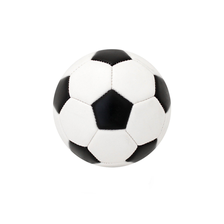

[805]
('n04254680', 'soccer_ball', 0.9999938)
('n03530642', 'honeycomb', 3.862427e-06)
('n03255030', 'dumbbell', 4.4424414e-07)
('n02782093', 'balloon', 3.7039203e-07)
('n04548280', 'wall_clock', 3.143872e-07)


'_________________________________________________________'

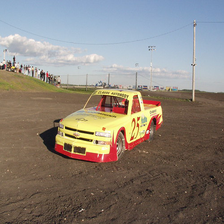

[751]
('n04037443', 'racer', 0.71319467)
('n03100240', 'convertible', 0.1008973)
('n04285008', 'sports_car', 0.07707668)
('n03930630', 'pickup', 0.026352933)
('n02704792', 'amphibian', 0.011636195)


In [5]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML
from tensorflow.keras.applications.mobilenet import decode_predictions

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

ROOT = "https://data.heatonresearch.com/data/t81-558/images/"

def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
        
L = "_________________________________________________________"

def classify_array(images):
    for url in images:
        x = []
        ImageFile.LOAD_TRUNCATED_IMAGES = False
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img.load()
        img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        x = x[:,:,:,:3] # maybe an alpha channel
        pred = model.predict(x)

        display(L)
        display(img)
        print(np.argmax(pred,axis=1))

        lst = decode_predictions(pred, top=5)
        for itm in lst[0]:
            print(itm)

classify_array( [
    ROOT+"soccer_ball.jpg",
    ROOT+"race_truck.jpg"
])

Overall, the neural network is doing quite well. 

For many applications, MobileNet might be entirely acceptable as an image classifier.  However, if you need to classify very specialized images not in the 1,000 image types supported by imagenet, it is necessary to use transfer learning.

### Transfer

It is possible to create your image classification network from scratch.  This endeavor would take considerable time and resources.  Just creating an image classifier would require many labeled pictures.  Using a pretrained neural network, you are tapping into knowledge already built into the lower layers of the neural network.  The transferred layers likely already have some notion of eyes, ears, feet, and fur.  These lower-level concepts help to train the neural network to identify these images.

Next, we reload the MobileNet; however, we set the *include_top* parameter to *False*. This setting instructs Keras not to load the final classification layers.  This setting is the common mode of operation for transfer learning.  We display a summary to see that the top classification layer is now missing.

In [6]:
base_model=MobileNet(weights='imagenet',include_top=False) 
#imports the mobilenet model and discards the last 1000 neuron layer.

base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 

We will add new top layers to the neural network.  Our final SoftMax layer includes support for 3 classes.

In [7]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
preds=Dense(4,activation='softmax')(x) 

Next, we mark the original MobileNet layers as non-trainable and our new layers as trainable.

In [8]:
model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

To train the neural network, we must create a directory structure to hold the images.  The Keras command **flow_from_directory** performs this for us.  It requires that a folder be laid out as follows. Each class is a folder that contains images of that class.  We can also specify a target size; in this case the original MobileNet size of 224x224 is desired.

For this simple example I included four classes, my directories are setup as follows:

* **trans** - The root directory of the dataset.
* **trans/cd** - Pictures of CD's.
* **trans/disk35** - Pictures of 3.5 inch disks.
* **trans/disk525** - Pictures of 5.25 inch disks.
* **trans/tape** - Pictures of tapes.


In [9]:
if COLAB:
  PATH = "/content/drive/My Drive/projects/trans/"
else:
  PATH = 'c:\\jth\\data\\trans'

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 

train_generator=train_datagen.flow_from_directory(PATH, 
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=52,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 52 images belonging to 4 classes.


We are now ready to compile and fit the neural network.  

In [10]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
model.fit(train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 2ms/step - loss: 1.6215 - accuracy: 0.2885
Epoch 2/50
1/1 [==============================] - 0s 1ms/step - loss: 2.0469 - accuracy: 0.4808
Epoch 3/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 1ms/step - loss: 0.9929 - accuracy: 0.6923
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0829 - accuracy: 0.9808
Epoch 6/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 1ms/step - loss: 8.4217e-04 - accuracy: 1.0000
Epoch 8/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 11/50
1/1 [==================

To make use of this neural network we will need to know which output neuron corrisponds to each of the training classes/directories we provided to the generator.  By calling the **class_indices** property of the generator, we are provided with this information.

In [11]:
print(train_generator.class_indices)

{'cd': 0, 'disk35': 1, 'disk525': 2, 'tape': 3}


We are now ready to see how our new model can predict our classes.  The URLs in the code some examples.  Feel free to add your own.  We did not use a large dataset, so it will not be perfect.  A larger training set will improve accuracy.

'_________________________________________________________'

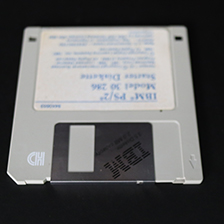

[[3.0885078e-25 1.0000000e+00 4.4679350e-28 0.0000000e+00]]
disk35


'_________________________________________________________'

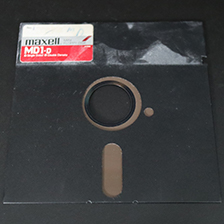

[[1.8025676e-27 1.2575651e-34 1.0000000e+00 8.7701346e-38]]
disk525


In [12]:
%matplotlib inline

def classify_array(images,classes):
    inv_map = {v: k for k, v in classes.items()}
    
    for url in images:
        x = []
        ImageFile.LOAD_TRUNCATED_IMAGES = False
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img.load()
        img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        x = x[:,:,:,:3] # maybe an alpha channel
        
        
        pred = model.predict(x)

        display(L)
        display(img)
        pred2 = int(np.argmax(pred,axis=1))
        print(pred)
        print(inv_map[pred2])
        #print(classes[pred2])
        #print(pred[0])


classify_array( [
    #ROOT+"disk_35.png",
    #ROOT+"disk_525.png",
    #ROOT+"disk_35b.png",
    #ROOT+"IMG_1563.jpg",
    #ROOT+"IMG_1565.jpg",
    ROOT+"IMG_1567.jpg",
    ROOT+"IMG_1570.jpg"
],train_generator.class_indices)


This is a very simple example, with a small dataset.  The accuracy will not be great; however, it demonstrates how to expand a pretrained model with your own images.